## Modelagem em Finanças Matematica - Projeto 1
### Grupo 4
#### Integrantes: Igor Torres, Sebastião Rodrigo  e  Guilherme Naylor



$\cdot$ Bibliotecas utilizadas no projeto:

In [26]:

import numpy as np
import random as rand
import matplotlib.pyplot as plt

## $\bullet$ Introdução
$  $

Projeto tem como base o exercício nove dos projetos computacionais do livro texto do curso. No exercício temos como principal a implementação do algoritmo de monte carlo em um contrato com up, down e juros variaveis no tempo. No desenvolvimento do codigo implementamos a opção de contrato de Lookback e colocamos também um contrato de call com barreiras.

## $\bullet$ Metodologia 



Inicialmente, dado o modelo do nosso contrato, pegamos e extrapolamos para qualquer tempo, com uma função que foi apresenta no livro: 

$ S_{n+1} = S_{n} \pm 30 $

A função abaixo calcula a ação no tempo n:

In [6]:
def valor_acao(n):#calcula o valor do contrato no tempo n
    v=[]
    for i in range (n+1):
        v.append(1000 + 30 * (n-i) - 30 * i)
    return v

####  $\cdot$ testes:

In [7]:
valor_acao(5),valor_acao(4),valor_acao(30)

([1150, 1090, 1030, 970, 910, 850],
 [1120, 1060, 1000, 940, 880],
 [1900,
  1840,
  1780,
  1720,
  1660,
  1600,
  1540,
  1480,
  1420,
  1360,
  1300,
  1240,
  1180,
  1120,
  1060,
  1000,
  940,
  880,
  820,
  760,
  700,
  640,
  580,
  520,
  460,
  400,
  340,
  280,
  220,
  160,
  100])

Segundo passo, após calcularmos a ação no tempo n, criamos a função que dado o vetor v de valores da ação no tempo n, retornara o valores da ação no tempo n-1.


In [13]:
def recurssao_acao(v): #recurssão dos valores do contrato v
    v_new=[]
    for i in range(len(v)-1):
        v_i=v[i]-30
        v_new.append(v_i)
    return v_new

####  $\cdot$ testes:

In [14]:

assert recurssao_acao(valor_acao(5)) == valor_acao(4)
assert recurssao_acao(valor_acao(30)) == valor_acao(29)

Como estabelecido no projeto nove, o juros foi dado a partir da seguinte formula:

$ r_{n} = 0.001(\dfrac{n}{n+1}) \pm 0.002$

Note que a cada tempo n, teremos dois valores para r. O valor utilizado será de acordo com o último passo dado.

In [16]:
def valor_juros(j):#calculamos a taxa de juros no tempo n
    r=[]
    r.append(0.01 * (j/(j+1)) + 0.002)
    r.append(0.01 * (j/(j+1)) - 0.002)
    if j==0:
        r=[0,0]
    return r

####  $\cdot$ testes:


In [19]:
valor_juros(10)

[0.01109090909090909, 0.00709090909090909]

Após definimos essas funções acima, conseguimos implementar um código que consegue verificar a ausência ou presença de arbitragem no contrato com base na fórmula: 

$ d \le r + 1 \le u$


Analisando a árvore do contrato, percebemos uma diferença nos caminhos das extremidades: Esses caminhos são gerados, exclusivamente, por Up ou por Down, portanto nesses casos verificaremos a arbitragem utilizando  apenas um dos r.

In [42]:
def arbitragem_verific(n): #verifica a arbitragem em n tempos.
    for k in range (n,0,-1):   
        futuro = valor_acao(k)
        atual = recurssao_acao(futuro)
        r= valor_juros(k-1)

        for j in range(len(atual)-1,-1,-1):

            if j==(0): #caso da extremidade onde temos apenas up, logo utilizamos apenas um r 
                u = futuro[j] / atual[j]
                d = futuro[j+1] / atual[j]
                assert d <= (1+r[0]) and (1+r[0]) <= u

            if j==(len(atual)-1): #caso da extremidade onde temos apenas down, logo utilizamos apenas um r
                u = futuro[j] / atual[j]
                d = futuro[j+1] / atual[j]
                assert d <= (1+r[1]) and  (1+r[1]) <= u

            else: #resto dos casos      
                u = futuro[j] / atual[j]
                d = futuro[j+1] / atual[j]
                assert d <= 1+r[0] and 1+r[0] <= u and d <= (1+r[1]) and  (1+r[1]) <= u

In [43]:
arbitragem_verific(30) #como podemos ver o contrato passou em todos os asserts, logo não possui arbitragem.

Para os próximos itens da questão, criamos um gerador de caminhos aleatórios. A cada iteração, o código fará um "sorteio", uma espécie de lançamento de uma moeda (baseado nas probabilidades neutras a risco). Desta forma, conseguimos definir se o próximo passo no caminho gerado será Up ou Down. Pode-se notar que colocamos uma variável discount, que nada mais é que a desvalorização do dinheiro em relação ao tempo.

In [37]:


def gerador_de_caminhos(n , S_0):#função para plotar gráfico
    max_ways , a = 20 , 0 
    lista=[]
    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        s=[S_0]
        discount = 1
        r = 0
        S = S_0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002
                s.append(S)
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002
                s.append(S)
        lista.append(s)
        a += 1
    return(lista)

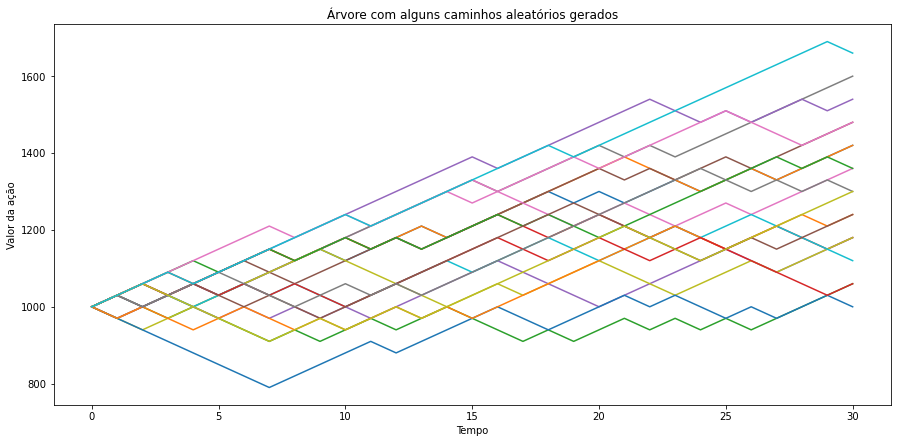

In [39]:
plt.figure(figsize=(15, 7)) 
for i in (gerador_de_caminhos(30 , 1000)):
    tempo=[j for j in range(len(i))]
    plt.plot( tempo, i ,'-')

plt.xlabel('Tempo')
plt.ylabel('Valor da ação')
plt.title('Árvore com alguns caminhos aleatórios gerados')
ax = plt.gca()
plt.show()


Agora chegamos na parte de implementação do algoritmo de Monte Carlo. Implementamos esse algoritmo utilizando a função criada acima, que gera caminhos aleatórios. Nas funções a seguir, calculamos o valor da opção em cada caminho gerado, e fazemos a média desses valores. Como mostrado no livro texto, este calculo nos retornará o valor aproximado da opção.

##### $\cdot$ Calcularemos o valor de um Call

In [79]:
def metodo_montecarlo(S_0, strike, n ): # utilizaremos a media do valor das opções em n caminhos diferentes 
    max_ways , soma_options, a  = 10000 , 0 , 0 

    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        discount = 1
        r = 0
        k=0
        S = S_0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002
               
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002
               
        a += 1
        soma_options += discount*(max(0, S - strike)) # escolhemos um call como opção, aqui calculamos o valor dele com o desconto calculado   
    return (soma_options / a) # média do valor das opções

##### $\cdot$ testes:

In [80]:
metodo_montecarlo(1000, 900 , 30 ) # call com strike 900.

282.7495089551177

In [81]:
metodo_montecarlo(1000, 700 , 30 ) #call com strike 700.

432.4750096677001

Como pedido na questão, implementamos o algoritmo com barreira. Adaptamos o código anterior adicionando uma barreira superior ( um If como condição de parada ). Por ser uma barreira superior, o valor do contrato só atingirá o valor da mesma se ocorrer um Up. Sendo assimm, só havia a necesessidade de verificar a condição imposta no caso de Up.    

In [82]:
def metodo_montecarlo_barreira(S_0, strike , barreira , n ): # utilizaremos a media do valor das opções em n caminhos diferentes 
    max_ways , soma_options, a  = 10000 , 0 , 0 

    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        discount = 1
        r = 0
        S = S_0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002
                if S > barreira: # Devemos verificar sempre se S ultrapassou a barreira. Se sim, este caminho teve o payoff zerado.
                    S=0
                    break
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002
        #print(S)
        a += 1
        soma_options += discount*(max(0, S - strike)) # escolhemos um call como opção, aqui calculamos o valor dele com o desconto calculado  
    return (soma_options / a) # média do valor das opções

#### $\cdot$ testes:

In [84]:
metodo_montecarlo_barreira(1000, 900 , 1500 , 30 ),metodo_montecarlo_barreira(1000, 900 , 1500 , 30 )

(237.06641576638458, 235.63086648819828)

###### $\cdot$ Lookback

Finalizando as exigências da questão, adaptamos o algoritmo para um novo caso de contrato, do tipo Lookback. O payoff desse tipo de contrato é dado por $ ( S_{max} - S_{min} )^+ $

In [63]:
def metodo_montecarlo_lookback(S_0, n ): # utilizaremos a media do valor das opções em n caminhos diferentes 
    max_ways , soma_options, a  = 10000 , 0 , 0 

    while a < max_ways:# fazendo caminhos aleatórios para calcularmos valores da opção
        discount = 1
        r = 0
        S = S_0
        S_max = S_0
        S_min = 0
        u , d = (S_0 + 30) / S_0 , (S_0 - 30) / S_0
        for i in range (n):
            p_neutral= ((1 + r) - d) / (u - d)
            q_neutral= 1 - p_neutral
            discount = discount/(1+r)
            
            if rand.random() < p_neutral: # geramos um número aleatório, uma espécie de sorteio para decidir se teremos up ou down no caminho
                S , r = S + 30 , 0.01 * (i / (i+1)) + 0.002#só é possível termos um valor máximo caso ocorra um down, por isso verificamos o ,máximo neste caso
                if S > S_max:
                    S_max = S
            
            else:
                S , r = S - 30 , 0.01 * (i / (i+1)) - 0.002 #só é possível termos um valor mínimo caso ocorra um down, por isso verificamos o mínimo neste caso
                if S < S_min:
                    S_min = S
        a += 1
        soma_options += discount*(max(0, S_max - S_min)) # escolhemos um lookback como opção, aqui calculamos o valor dele com o desconto calculado  
    return (str('O valor aproximado da opção é: '+str(soma_options / a))) # média do valor das opções

#### $\cdot$ testes:

In [85]:
metodo_montecarlo_lookback(1000, 30),metodo_montecarlo_lookback(1000, 30)

('O valor aproximado da opção é: 993.6883537889105',
 'O valor aproximado da opção é: 995.7624060414361')

## $\bullet$ Conclusão

Agora apresentaremos o estudo de algumas funções. 

### $\cdot$ Função Call

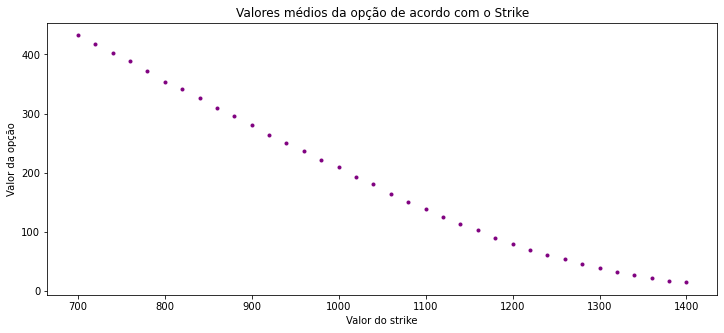

In [86]:
valores_strike=[]
optionv=[]
for i in range (700, 1401, 20):
    valores_strike.append(i)
    optionv.append(metodo_montecarlo(1000, i , 30 ))

plt.figure(figsize=(12, 5))
plt.plot(valores_strike, optionv ,'.', color = 'purple')
plt.xlabel('Valor do strike')
plt.ylabel('Valor da opção')
plt.title('Valores médios da opção de acordo com o Strike')
ax = plt.gca()
plt.show()

Podemos ver que quanto maior o strike, temos que menor será o valor da opção. De fato, fica evidente que quanto maior o valor do strike, menor a probabilidade da ação ultrapassar esse valor. Logo, maiores as chances da opção perder o seu valor.

#### $\cdot$ Função da Barreira

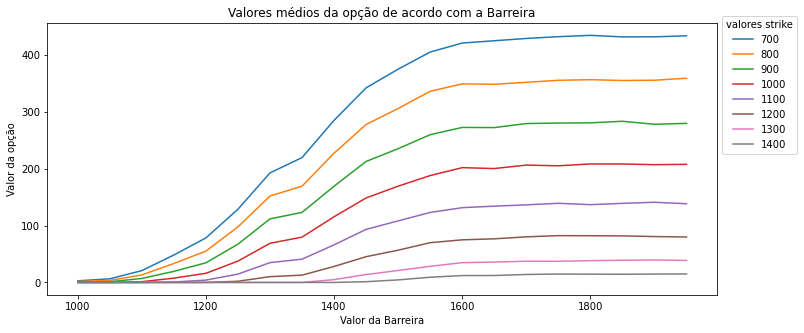

In [77]:
valores_barreira=[]
optionv=[]
plt.figure(figsize=(12, 5))
for j in range (700, 1401, 100):
    valores_barreira=[]
    optionv=[]    
    for i in range (1000, 2000, 50):    
        valores_barreira.append(i)
        optionv.append(metodo_montecarlo_barreira(1000, j , i , 30 ))
    plt.plot(valores_barreira, optionv , label=str(j))
plt.legend(title='valores strike', bbox_to_anchor=(1,0.5), loc='lower left')
plt.xlabel('Valor da Barreira')
plt.ylabel('Valor da opção')
plt.title('Valores médios da opção de acordo com a Barreira')
ax = plt.gca()
plt.show()    

Observamos que quanto mais proximo o strike estiver do valor da barreira, menor será a margem de exercício da opção, consequentemente menor será o seu valor. Além disso, temos que quanto maior o valor da barreira, menores a chance de payoff nulo (igual a zero), logo, maior o valor da opção. 